# 1.Google Collab Environment Setup

Please run this Google Colab Jupyter Notebook with the following settings under "Runtime" -> "Change runtime type".

Runtime type: Python 3

Hardware accelerator: T4 GPU

## Setting up Python 3.8
This project uses Python 3.8 whilst Google Colab currently uses Python 3.10. Run the following commands to downgrade to Python 3.8.

Note: This process takes quite some time so you can leave it running in the background.

Install Required Dependencies

In [1]:
# downgrade Python by reinstalling pip and distutils
!apt-get install python3.8 python3-pip python3.8-distutils
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 1

# check the result
!python --version

!apt-get update
!apt install software-properties-common
!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel
!apt-get install python3-pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support
  python3-setuptools python3-wheel python3.8-lib2to3 python3.8-minimal
Suggested packages:
  python-setuptools-doc python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support python3-pip
  python3-setuptools python3-wheel python3.8 python3.8-distutils
  python3.8-lib2to3 python3.8-minimal
0 upgraded, 11 newly installed, 0 to remove and 18 not upgraded.
Need to get 7,094 kB of archives.
After this operation, 29.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 p

In [2]:
# clone FollowYourPose repository
!git clone https://github.com/mayuelala/FollowYourPose.git

# clone team 15's repository
!git clone https://github.com/ong-yi-xuan/ict3104-team15.git

Cloning into 'FollowYourPose'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 325 (delta 35), reused 71 (delta 20), pack-reused 237
Receiving objects: 100% (325/325), 277.89 MiB | 30.85 MiB/s, done.
Resolving deltas: 100% (92/92), done.
Cloning into 'ict3104-team15'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 168 (delta 6), reused 24 (delta 3), pack-reused 138
Receiving objects: 100% (168/168), 212.32 MiB | 36.54 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [6]:
# install required dependencies
!python3 -m pip install -q $(grep -ivE "triton|torch|torchvision|xformers" FollowYourPose/requirements.txt) # Install all except those specified (outdated in the req file)
!python3 -m pip install -q triton==2.0.0 torch==2.0.1 torchvision imageio-ffmpeg xformers==0.0.21 --extra-index-url https://download.pytorch.org/whl/cu113
!python3 -m pip install ipywidgets
!python3 -m pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 KB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 26.3 MB/s eta 

In [4]:
# importing other dependencies
import yaml
import gdown
import os
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML, Image, Video

In [5]:
# download txt2video file
txt2video_file_id = "19jT40m76ZPkF_zUVa66QGiBJP9UsSvjn"
url = 'https://drive.google.com/uc?id=' + txt2video_file_id
output = 'txt2video.py'  # Desired name of the downloaded file
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=19jT40m76ZPkF_zUVa66QGiBJP9UsSvjn
To: /content/txt2video.py
100%|██████████| 7.14k/7.14k [00:00<00:00, 4.47MB/s]


'txt2video.py'

# 2. Data Exploration

R2. A Data Exploration section in the notebook that can load, list and display video data from the Charades project (will change the description later on, this is here to track that we're meeting all the requirements)

1. A data folder in the repo with subfolders that store input video files and other related input files for different types of datasets ✅
2. Choose a video file from the data folder through an appropriate UI component (e.g., dropdown menu) in a notebook code cell ✅
3. See video playback of the chosen video file in an output cell ✅  

In [ ]:
main_directory = 'ict3104-team15/data'
folder_contents = os.listdir(main_directory)

folder_dropdown = widgets.Dropdown(
    options=folder_contents,
    description='Select a folder:',
)

mp4_dropdown = widgets.Dropdown(
    options=['Select a folder first'],
    description='Select an .mp4 file:',
    disabled=True,
)

button = widgets.Button(description="Play .mp4 File")
output = widgets.Output()

# Function to update the .mp4 dropdown based on the selected folder
def update_mp4_dropdown(change):
    selected_folder = change.new
    selected_directory = os.path.join(main_directory, selected_folder)

    if os.path.isdir(selected_directory):
        mp4_files = [f for f in os.listdir(selected_directory) if f.lower().endswith('.mp4')]
        mp4_dropdown.options = mp4_files
        mp4_dropdown.disabled = False
    else:
        mp4_dropdown.options = ['Select a folder first']
        mp4_dropdown.disabled = True

# Function to play the selected .mp4 file
def play_mp4_file(_):
    selected_mp4 = mp4_dropdown.value
    selected_folder = folder_dropdown.value
    selected_directory = os.path.join(main_directory, selected_folder)
    save_path = os.path.join(selected_directory, selected_mp4)

    if selected_mp4.lower().endswith('.mp4'):
        with output:
            clear_output(wait=True)
            display(Video(save_path, embed=True))
    else:
        with output:
            clear_output(wait=True)
            print("Please select a valid .mp4 file.")

folder_dropdown.observe(update_mp4_dropdown, names='value')
button.on_click(play_mp4_file)

display(folder_dropdown)
display(mp4_dropdown)
display(button)
display(output)


Dropdown(description='Select a folder:', options=('a man in the park, Van Gogh style.gif', 'A Iron man on the …

Dropdown(description='Select a .gif file:', disabled=True, options=('Select a folder first',), value='Select a…

Button(description='Play .gif File', style=ButtonStyle())

Output()

# 3. Inference
R3. An Inference section in the notebook that can perform inference using a pretrained genAI model based on the Charades project.  

1. Load a pretrained model using an appropriate UI component  
2. Have appropriate UI components to let the user choose an input video from the Charades project, and write in a text prompt as input into the genAI model.  
3. See inference results in the form of output videos with captions that depict the action/activity.   

## 3.1. Create a folder to store models

In [ ]:
%mkdir checkpoints
!git lfs install

Git LFS initialized.


## 3.2. Download or select pre-trained model


In [36]:
#@markdown Download FollowYourPose model from a remote repo
MODEL_NAME = "YueMafighting/FollowYourPose_v1" #@param {type:"string"}

#@markdown Untick the checkbox below if the model is loaded from a local path
download_pretrained_model = False #@param {type:"boolean"}

if download_pretrained_model:
    SAVE_LOCATION = f"./checkpoints/"
    !git clone https://huggingface.co/$MODEL_NAME checkpoints/
    print(f"[*] saved successfully in {SAVE_LOCATION}")
else:
    selected_folder = None

    folder_dropdown = widgets.Dropdown(
        options=sorted(os.listdir('checkpoints')),
        description='Select a folder:',
        layout=widgets.Layout(width='auto')
    )

    confirm_button = widgets.Button(
        description="Confirm Selection",
        layout=widgets.Layout(width='auto')
    )

    def confirm_button_click(b):
        global selected_folder
        if selected_folder:
            print(f"[*] Folder selected: {selected_folder}")
        else:
            print("Please select a folder.")

    # the selected folder here will be used by the next code block by default
    def folder_selection(change):
        global selected_folder
        selected_folder = change.new

    folder_dropdown.observe(folder_selection, names='value')
    confirm_button.on_click(confirm_button_click)

    display(folder_dropdown, confirm_button)

Dropdown(description='Select a folder:', layout=Layout(width='auto'), options=('.git', '.gitattributes', 'READ…

Button(description='Confirm Selection', layout=Layout(width='auto'), style=ButtonStyle())

[*] Folder selected: stable-diffusion-v1-4


## 3.3. Set Inference Configuration Settings

The code below saves user defined configuration settings into a configuration file for running inference.
<br>
Important When using Google Colab, the maximum video length should be 8 due to lack of resources.

<br>

**To save the config file, change the inputs as desired and run the cell again**

### 3.3.1 Prompts

Enter the prompts for inference. You can enter multiple prompts as well, by separating each prompt in a new line

Example of how a multiple prompt input should look like:

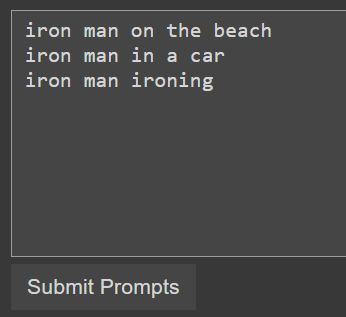

In [45]:
prompts_input = widgets.Textarea(
    placeholder="Enter prompts (one per line)",
    layout=widgets.Layout(width='auto', height='150px')
)

submit_button = widgets.Button(
    description="Submit Prompts",
    layout=widgets.Layout(width='auto')
)

def handle_submit_button_click(b):
    global prompts_list
    prompts_text = prompts_input.value
    prompts_list = [x.strip() for x in prompts_text.split('\n')]
    print("Submitted Prompts:")
    for prompt in prompts_list:
        print(prompt)

submit_button.on_click(handle_submit_button_click)

display(prompts_input, submit_button)

Textarea(value='', layout=Layout(height='150px', width='auto'), placeholder='Enter prompts (one per line)')

Button(description='Submit Prompts', layout=Layout(width='auto'), style=ButtonStyle())

Submitted Prompts:
iron man on the beach
iron man in a car
iron man ironing


In [47]:
#@markdown Inference: Config for generating videos
config_file_name = "pose_test.yaml" #@param {type:"string"}
pretrained_model_path = "./checkpoints/" + selected_folder #@param {type:"string"}
video_output_dir = "gif_results" #@param {type:"string"}

split_prompts = [x.strip() for x in prompts_list]

# checkpoint config
resume_from_checkpoint = "./checkpoints/followyourpose_checkpoint-1000" #@param {type:"string"}

#@markdown <br> Default video settings
# seed for reproducibility
seed = 33 #@param {type:"integer"}

# video config settings
video_length = 8 #@param {type:"integer"}
video_width = 512 #@param {type:"integer"}
video_height = 512 #@param {type:"integer"}

# inference config settings
num_inference_steps = 50 #@param {type:"number"}
guidance_scale = 12.5 #@param {type:"number"}
use_inv_latent = False #@param {type:"boolean"}
num_inv_steps = 50 #@param {type:"number"}
dataset_set = "val" #@param {type:"string"}

train_batch_size = 1
validation_steps = 100
mixed_precision = 'no'
gradient_checkpointing = False
enable_xformers_memory_efficient_attention = True

# save as config file
config_dir = "FollowYourPose/configs"

# save each config item into dictionary
config_dict = {
  'pretrained_model_path': pretrained_model_path,
  'output_dir': video_output_dir,
  'validation_data':
    {
      'prompts': prompts_list,
      'video_length': video_length,
      'width': video_width,
      'height': video_height,
      'num_inference_steps': num_inference_steps,
      'guidance_scale': guidance_scale,
      'use_inv_latent': use_inv_latent,
      'num_inv_steps': num_inv_steps,
      'dataset_set': dataset_set,
    },
  'train_batch_size': train_batch_size,
  'validation_steps': validation_steps,
  'resume_from_checkpoint': resume_from_checkpoint,
  'seed': seed,
  'mixed_precision': mixed_precision,
  'gradient_checkpointing': gradient_checkpointing,
  'enable_xformers_memory_efficient_attention': enable_xformers_memory_efficient_attention
}

# save dictionary as config yaml file
config_file = config_dir + '/' + config_file_name
with open(config_file, 'w') as file:
  yaml.dump(config_dict, file, sort_keys=False)

print("Config file saved as " + config_file)


Config file saved as FollowYourPose/configs/pose_test.yaml


## 3.4. Generate Content

**To generate the inference outputs files, change the file paths as desired and run the cell again**

In [ ]:
config_file = "FollowYourPose/configs/pose_test.yaml" #@param {type:"string"}
MMPOSE_skeleton_file = "FollowYourPose/pose_example/vis_ikun_pose2.mov" #@param {type:"string"}

!accelerate launch txt2video.py --config={config_file}  --skeleton_path={MMPOSE_skeleton_file}

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(
gif_results
10/09/2023 16:38:41 -

## 3.5. Play Videos

Select the desired file and play the generated gifs.

In [59]:
gif_output_directory = './FollowYourPose/gif_results'

folder_contents = os.listdir(gif_output_directory)

gif_files = [file for file in folder_contents if file.lower().endswith('.gif')]

gif_dropdown = widgets.Dropdown(
    options=gif_files,
    description='Select a .gif file:',
    disabled=False,
)

button = widgets.Button(description="Play .gif File")
output = widgets.Output()

# Function to play the selected .gif file
def play_gif_file(_):
    selected_gif = gif_dropdown.value
    save_path = os.path.join(gif_output_directory, selected_gif)

    if selected_gif.lower().endswith('.gif'):
        with output:
            clear_output(wait=True)
            display(Image(open(save_path, 'rb').read(), format='png'))
    else:
        with output:
            clear_output(wait=True)
            print("Please select a valid .gif file.")

button.on_click(play_gif_file)

display(gif_dropdown)
display(button)
display(output)


Dropdown(description='Select a .gif file:', options=('sdsdA Iron man on the beach.gif', 'A Astronaut.gif', 'er…

Button(description='Play .gif File', style=ButtonStyle())

Output()

## 3.6. Exit and free runtime memory

In [ ]:
exit()